### The following code was tested on:  
Python 3+ running on...  

ULB Cluster - user epb123

# Analysis

## Foreward:

Each query follows the following structure:

1. Computation solution: we briefly explain how computed the query, the challenges we had and, when necessary, the inferences we made.

2. The computation itself: commented code.

3. Graphs: A few comments.

4. Question responses and comments on the graphs.

### Libraries

- pandas: classical data analysis tool for python. Allows the creation of a dataframe from a varied range of inputs.
- matplotlib: classical library for graphical representations in Python.
- os is used to create a list of directories within a file at the begining of the notebook.
- register_matplotlib_converters() changes the matplotlib unit registry and allows for customization. Here we take advantage of that to reformat our axis unit in datetime format.

In [1]:
#Standard imports for use of matplotlib.

import os
import pickle
import datetime
import numpy as np

import pandas as pd
import pandas.io.common 
from pandas.plotting import register_matplotlib_converters

import matplotlib as mpl
from matplotlib import dates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

register_matplotlib_converters()

### Input filles

Here the user can enter their directories leading to the files of the clean data sets for the yellow, green, FHV, FHVHV taxi services.

Warning: here the user also needs to give the path to "taxi+zone_loopup.csv" available here:
https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv

In [2]:
# INPUT FILES

v_direc = pickle.load(open("v_direc",'rb'))
base_directory = pickle.load(open(v_direc + 'base_directory','rb'))

#file classifying the different zones of NYC in their borough. Allows us to match the location ID of a trip to a borough.
#ADD YOUR DIRECT TAXI ZONE LOOKUP CSV PATH IF NOT IN BASE DIRECTORY
borough_lookup = base_directory + 'taxi+_zone_lookup.csv'

#enter the directories where the clean version of the files are stored
clean_fhv_directory = base_directory + r'output/cleaned FHV/all CSV/'
clean_fhvhv_directory = base_directory + r'output/cleaned FHVHV/all CSV/'
clean_green_directory = base_directory + r'output/cleaned Green/all CSV/'
clean_yellow_directory = base_directory + r'output/cleaned YELLOW/all CSV/'

### Auxilary functions

In [3]:
#with this function I create a list of the paths for all the csv's in the directory passed as input.

def list_of_paths(directory):

    new_paths = []
    paths = os.listdir(directory)
    paths.sort()
    for i in range(0,len(paths),1):
        paths[i] = directory + paths[i]
        #Jupyter occasionally adds extra files to the system, which would otherwise be picked up
        #We are using an os walk here, and not a pickled list from 2.3, so we need to filter
        if '.csvclean.csv' not in paths [i] and '.ipynb_checkpoints' not in paths[i] and '/.csvclean' not in paths[i]:

            # we use this exception catch in case some output files of the 2.3 code are returned empty
            # as we saw in 2.3, in yellow some early datasets have no valid records
            try:
                pd.read_csv(paths[i])
                new_paths.append(paths[i])
            except pandas.io.common.EmptyDataError:
                pass
            
    return new_paths

In [4]:
clean_yellow_paths = list_of_paths(clean_yellow_directory)
clean_fhv_paths = list_of_paths(clean_fhv_directory)
clean_fhvhv_paths = list_of_paths(clean_fhvhv_directory)
clean_green_paths = list_of_paths(clean_green_directory)

In [5]:
def firsttime_save_clean_df(saveDF, saveName, savePath):
# Function takes a dataframe, filename, and filepath and saves the dataframe
# csv will be saved inside a folder with the given saveName, along with a text file _SUCCESS

    newFilepath = os.path.join(savePath, saveName)
    saveDF.to_csv(newFilepath)
    
    return newFilepath

In [6]:
def save_analysis_df(saveDF, currentPath):
# Function takes a dataframe, filename, and filepath and saves the dataframe
# csv will be saved inside a folder with the given saveName, along with a text file _SUCCESS

    saveDF.to_csv(currentPath)

In [7]:
def create_folder(newFolderName, newFolderPath):
# Function takes a folder name and a path and creates a new folder/directory
# Function returns folder path
    
    fullFolderPath = os.path.join(newFolderPath, newFolderName)
    
    # Folder might already have been created
    try:
        os.mkdir(fullFolderPath)
        print("new folder created at "+ fullFolderPath)
    except FileExistsError:
        print("folder already exists at " + fullFolderPath)
    
    return fullFolderPath

In [8]:
# First thing we should do is create a new place to keep modified dataframes, and copy the clean dataframes into it
# The 2.3 code is exceedingly long, and we do not want to have to re-run it

yellow_analysis_folder = create_folder("YELLOW analysis", base_directory + 'output/')
green_analysis_folder = create_folder("GREEN analysis", base_directory + 'output/')
fhv_analysis_folder = create_folder("FHV analysis", base_directory + 'output/')
fhvhv_analysis_folder = create_folder("FHVHV analysis", base_directory + 'output/')

folder already exists at /home/epb123/output/YELLOW analysis
folder already exists at /home/epb123/output/GREEN analysis
folder already exists at /home/epb123/output/FHV analysis
folder already exists at /home/epb123/output/FHVHV analysis


In [9]:
def copy_to_analysis(original_clean_paths, newFolder):
    
    analysis_file_paths = []
    
    for i in original_clean_paths:
        cleandf = pd.read_csv(i)
        newAnalysisPath = firsttime_save_clean_df(cleandf, os.path.basename(i), newFolder)
        
        print(newAnalysisPath + ' saved')
        analysis_file_paths.append(newAnalysisPath)
        
    return analysis_file_paths

In [10]:
#We save the cleaned files to a new directory to avoid having to re-run our 2.3 code
#We modify the files later, and do not want to damage our clean records

analysis_fhvhv_paths = copy_to_analysis(clean_fhvhv_paths,fhvhv_analysis_folder)
analysis_fhv_paths = copy_to_analysis(clean_fhv_paths,fhv_analysis_folder)
analysis_green_paths = copy_to_analysis(clean_green_paths,green_analysis_folder)
analysis_yellow_paths = copy_to_analysis(clean_yellow_paths,yellow_analysis_folder)

/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2019-02.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2019-03.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2019-04.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2019-05.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2019-06.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2020-01.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2020-03.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2020-04.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2020-05.csvclean saved
/home/epb123/output/FHVHV analysis/fhvhv_tripdata_2020-06.csvclean saved
/home/epb123/output/FHV analysis/fhv_tripdata_2017-06.csvclean saved
/home/epb123/output/FHV analysis/fhv_tripdata_2017-07.csvclean saved
/home/epb123/output/FHV analysis/fhv_tripdata_2017-08.csvclean saved
/home/epb123/output/FHV analysis/fhv_tripdata_2017-09.csvclean 

Let's now calculate the variables we need for the queries - this saves us file loading/saving cycles

In [11]:
def get_pathdate(givenpath):
# Function to get the year from a given filepath
# Returns the year as an integer
    return givenpath[-16:-9]

#This two number are found manually. IF THE NAME OF THE FILES CHANGES the function MUST BE CHANGED.

In [12]:
#This function allows us to modify our datraframe with the information available on the website of NYC pairing each
#locationID with a borough.
#Useful for query 2 and query 7

#loading the official CSV of NYC containing the locationID of each borough
bdf = pd.read_csv(borough_lookup)

#lists to test the locationID of DF against the official CSV
bdf.sort_values('Borough',inplace=True)

#Note: we here have to use .isin(['xyz']) due to disagreements between Numpy and Pandas
BronxID = bdf[bdf['Borough'].isin(['Bronx'])]['LocationID'].tolist()
ManhattanID = bdf[bdf['Borough'].isin(['Manhattan'])]['LocationID'].tolist()
QueensID = bdf[bdf['Borough'].isin(['Queens'])]['LocationID'].tolist()
BrooklynID = bdf[bdf['Borough'].isin(['Brooklyn'])]['LocationID'].tolist()
Staten_IslandID = bdf[bdf['Borough'].isin(['Staten Island'])]['LocationID'].tolist()
BoroughID = [BronxID,BrooklynID,ManhattanID,QueensID,Staten_IslandID]
Name_Borough = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
    
def add_Borough(DF):
    #Takes a DF and matches its pulocationID with a BoroughPU and its dolocationID with a BoroughDO
    
    #Modifying the passed dataframe DF by adding two new variables 'BoroughPU' and BoroughDO'.
    DF['BoroughPU']=''
    DF['BoroughDO']=''
    for j in range (0,len(BoroughID),1):
        for i in range (0,len(BoroughID[j]),1):
            DF.loc[DF['pulocationid']==BoroughID[j][i],'BoroughPU'] = Name_Borough[j]
            DF.loc[DF['dolocationid']==BoroughID[j][i],'BoroughDO'] = Name_Borough[j]

    return DF

In [13]:
# Adding an ID for the zone of departure for q8

q8ID = [[161,162,163,164],[68,246],[230],[100]]
Name_q8 = ['Midtown', 'Chelsea','Times Square','Garment District']
    
def add_Airport_Departure(DF):
    #Takes a DF and matches its pulocationID with a BoroughPU and its dolocationID with a BoroughDO
    
    #Modifying the passed dataframe DF by adding two new variables 'BoroughPU' and BoroughDO'.
    DF['airport_departure']=''
    for j in range (0,len(q8ID),1):
        for i in range (0,len(q8ID[j]),1):
            DF.loc[DF['pulocationid']==q8ID[j][i],'airport_departure'] = Name_q8[j]

    return DF

In [14]:
def add_FHV_HV_Variables(type_filepath):
    #adds all required calculation variables for FHV & FHVHV Taxi types
    for i in range (0,len(type_filepath),1):

        df = pd.read_csv(type_filepath[i])
        df = add_Borough(df)

        #Adding an Airport Departure ID
        df = add_Airport_Departure(df)
        
        #to be able to compute the elapsed time during pick up and drop off time, one needs to change the format:
        df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
        df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

        #add the bin for q8
        df['bin'] = df['pickup_datetime'].dt.hour.astype(int)

        #then we simply compute the difference
        df['trip_time']=df['dropoff_datetime']-df['pickup_datetime']

        #in order to use this difference in the computation of other variables, one needs to change its format to a the total number of seconds.
        #To do that one needs to change the format of the pd series to be timedelta.
        df['trip_time']=pd.Series(pd.to_timedelta(df['trip_time']))
        #Then we can convert to total_seconds()
        df['trip_time']=df['trip_time'].dt.total_seconds()

        #conversion to minutes, and then hours.
        df['trip_time_m']=df['trip_time']/60
        df['trip_time_h']=df['trip_time_m']/60
        
        #short-form date time for q8
        fileDateTime = get_pathdate(type_filepath[i])
        
        datetimeList = []
        for j in range(0,len(df)):
            datetimeList.append(fileDateTime)
        
        df['airport_date'] = datetimeList
        
        #save the df so we don't have to keep calculating the variables
        save_analysis_df(df, type_filepath[i])
        

In [15]:
add_FHV_HV_Variables(analysis_fhv_paths)
add_FHV_HV_Variables(analysis_fhvhv_paths)

In [16]:
def add_Color_Variables(type_filepath):
    #adds all required calculation variables for Colored Taxi types
    for i in range (0,len(type_filepath),1):

        df = pd.read_csv(type_filepath[i])
        
        GreenFlag = False
        
        #Checking for tpep vs. lpep
        if 'lpep_pickup_datetime' in df.columns.tolist():
            GreenFlag = True
        
        #Let's rename these columns
        if GreenFlag == True:
            df = df.rename({'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime'}, axis=1)
        else:
            df = df.rename({'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}, axis=1)
        
        #Adding an Airport Departure ID
        df = add_Airport_Departure(df)

        #Adding a Borough ID
        df = add_Borough(df)
        
        #We will discuss later, but we will use this relation for accurate trip costs
        df['costs']=df['total_amount']-df['tip_amount']
        
        #let's harmonise datetime variable names
        
        #to be able to compute the elapsed time during pick up and drop off time, one needs to change the format:
        df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
        df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
        
        #add the bin for q8
        df['bin'] = df['pickup_datetime'].dt.hour.astype(int)

        #then we simply compute the difference
        df['trip_time']=df['dropoff_datetime']-df['pickup_datetime']

        #in order to use this difference in the computation of other variables, one needs to change its format to a the total number of seconds.
        #To do that one needs to change the format of the pd series to be timedelta.
        df['trip_time']=pd.Series(pd.to_timedelta(df['trip_time']))
        #Then we can convert to total_seconds()
        df['trip_time']=df['trip_time'].dt.total_seconds()

        #conversion to minutes, and then hours.
        df['trip_time_m']=df['trip_time']/60
        df['trip_time_h']=df['trip_time_m']/60

        #Computation of the cost per in progress minutes
        df['costs_per_in_prog_min'] = df['costs'].divide(df['trip_time_m'])

        #speed computations for query 7 & 8 are calculated here to avoid unnecessary load/save loops.
        #We need to filter for 0 values in trip_distance here, as we did not drop them in our t3 loop, since they are still valid
        #(to reiterate our reasoning - a trip would still be recordable if the driver was simply left waiting for an hour)
        #Pandas will give us 'inf' values for these trips. We can catch that by replacing with a 0 speed entry.
        #We will need to remember to filter for 0 speed later, and calculate queries based on trips with movement.
        df['trip_speed']=df['trip_distance'].divide(df['trip_time_h']).replace(np.inf, 0)
        
        #short-form date time for q8
        fileDateTime = get_pathdate(type_filepath[i])
        datetimeList = []

        for j in range(0,len(df)):
            datetimeList.append(fileDateTime)
        
        df['airport_date'] = datetimeList
        
        #save the df so we don't have to keep calculating the variables
        save_analysis_df(df, type_filepath[i])

In [17]:
add_Color_Variables(analysis_green_paths)
add_Color_Variables(analysis_yellow_paths)

## Query 1: What is the number of trips per month per data set?

The monthly total number of trips, grouped per dataset type. When plotted over time
(i.e., with the months in chronological order on the x-axis), this query should allow you to
see how the popularity of a particular service (Yellow Taxi, Green Taxi, FHV, FHVHV)
is evolving over time.

In [18]:
def Xs_for_graphs(lst_date):
    
    #Takes a list of strings and convert them into datetime format.
    #Necessary for the graphs.

    x = [datetime.datetime.strptime(d,"%Y-%m").date() for d in lst_date]
    
    return x

In [19]:
def query_1(data,data_type):
    
    #takes the list of paths for one type of data set and its name (FHV,FHVHV,green,yellow).
    #return a tuple of two lists. One list with the number of trips for each month and one list with
    #the number of trips for this month.
    
    count = []
    lst_date = []
    
    for i in range (0,len(data),1):

        df = pd.read_csv(data[i])
        #count the number of trips in a month
        count.append(len(df.index))

        #list the date of each file
        lst_date.append(get_pathdate(data[i]))

    #keeping track
    print('Between '+str(lst_date[0])+' and '+str(lst_date[-1])+' there were '+ str(sum(count))+' '+str(data_type)+' trips' )
    
    #and convert it the datetime format specified
    x = Xs_for_graphs(lst_date)

    return (x,count)    

In [20]:
tup_yellow = query_1(analysis_yellow_paths,'yellow')
tup_green = query_1(analysis_green_paths,'green')
tup_fhv = query_1(analysis_fhv_paths,'fhv')
tup_fhvhv = query_1(analysis_fhvhv_paths,'fhvhv')

Between 2009-01 and 2020-06 there were 3069850 yellow trips
Between 2013-08 and 2020-06 there were 150081 green trips
Between 2017-06 and 2020-05 there were 660591 fhv trips
Between 2019-02 and 2020-06 there were 312008 fhvhv trips


#### Comment:

The two next functions are defined now because we just computed the values for our x axis for each graph in this notebook (except for the last one).

In [21]:
def One_graph_for_two(y_yellow, y_green,title, y_label,x_label):
    
    #Plot the values passed against the time.
    
    #set the size of the graph
    plt.figure(figsize=(20,10))

    #set the x axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    
    #Define the series to display
    plt.plot(tup_yellow[0],y_yellow,label='Yellow', color='yellow')
    plt.plot(tup_green[0],y_green, color='green',label='Green')
    
    #parameters
    plt.title(title,fontsize=24)
    plt.ylabel(y_label,fontsize = 19)
    plt.xlabel(x_label, fontsize = 19)
    plt.legend(loc='upper left',fontsize=20)
    plt.show()

In [22]:
def One_graph_for_four(y_yellow, y_green, y_fhv, y_fhvhv, title, y_label, x_label):
    
    #Plot the values passed against the time.
    
    #set the size of the graph
    plt.figure(figsize=(20,10))

    #set the x axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    
    #Define the series to display
    plt.plot(tup_yellow[0],y_yellow,label='Yellow', color='yellow')
    plt.plot(tup_green[0],y_green, color='green',label='Green')
    plt.plot(tup_fhv[0],y_fhv,label='FHV', color='blue')
    plt.plot(tup_fhvhv[0],y_fhvhv,label='FHVHV' ,color='magenta')
    
    #parameters
    plt.title(title,fontsize=24)
    plt.ylabel(y_label,fontsize = 19)
    plt.xlabel(x_label, fontsize = 19)
    plt.legend(loc='upper left',fontsize=20)
    plt.show()

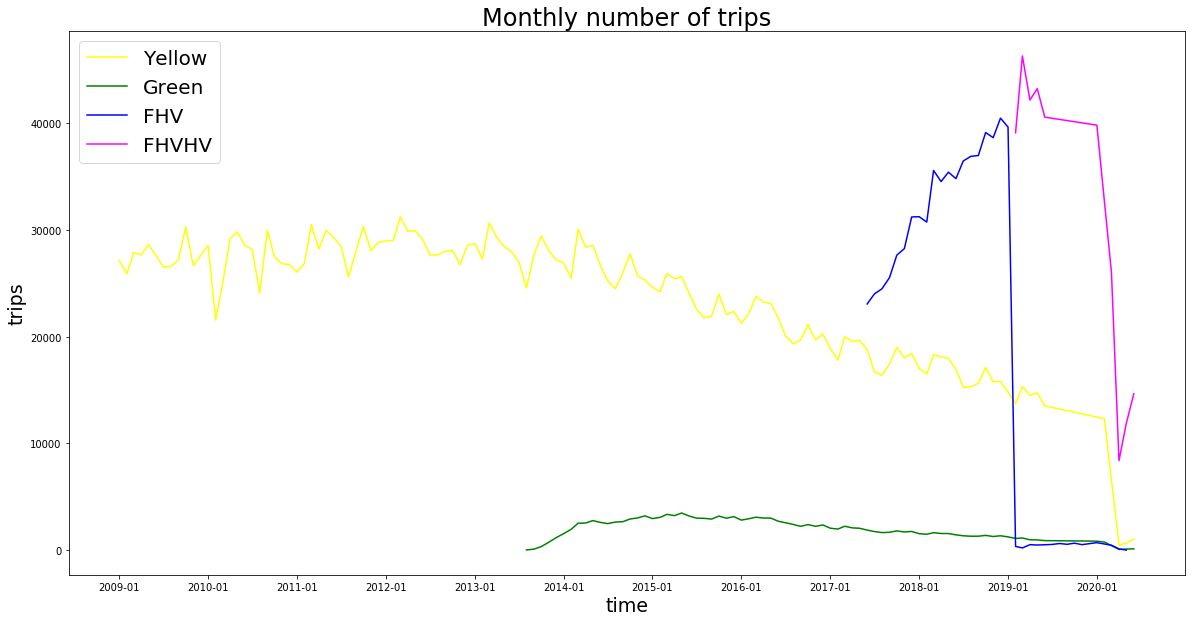

In [23]:
One_graph_for_four(tup_yellow[1],tup_green[1],tup_fhv[1],tup_fhvhv[1],'Monthly number of trips','trips', 'time')

### Comment on the graph

Firstly, we can see a sharp drop in the number of FHV *(for-hire-vehicle - bases for companies dispatching 10,000+ trip per day, meaning Uber, Lyft, Via, and Juno), community livery bases, luxury limousine bases, and black car bases.)* trips. While this was certainly not helped by the aggressive data cleaning undertaken in 2.3, the drop does correspond to the unadulterated data set.  
A trip to the NYC TLC website explains this, and also offers some interesting inferences on rideshares in NYC. In 2019-02, a "High Volume License Number" was added. Essentially, this meant that the large rideshare companies (in FHVHV currently Uber, Lyft, Via, and Juno) would have dropped off of the FHV data and moved to their owh FHVHV dataset. The remainder in FHV would then represent the number of more standard for-hire trips - essentially the number of limousines ordered per month.

The TLC also explains the 2017 starting date of our clean records. "In summer of 2017, the TLC mandated that the companies provide the drop-off date/time and the drop-off location. In 2017, the TLC also started to receive information on shared rides". 

In the chart as a whole, we can see the clear trends. Yellow cabs seem to have been on a steady downward decline, in contrast to the meteoric rise of Uber, as customers substitute away from traditional taxi services. 'Green' pre-booked taxis appear not to be particularly popular, and their popularity has decreased slightly with time. They do appear on a slight upward trend between 2014 and 2016, but the rise of Uber has meant their popularity has only been decreasing since.

One fascinating aspect is the seasonality of the yellow taxi data - it appears as if every spring and autumn season, taxis explode in popularity. Given this spring and autumn are tropical storm and hurricane season, respectively, this makes sense. What is surprising, however, is that the trend drops in winter and in summer. In winter, we would perhaps expect people to stay home more often, but in summer trips should generally be more popular.

Lastly, we can see the clear impact of covid-19 in the early 2020 data. Almost all trips drop to 0 during this period, as NYC was the center of the American epidemic.

## Query 2
Monthly total number of trips in Manhattan and Brooklyn, grouped per dataset type. Plot over time.

### Computations:
The challenge here is that the borough in which a trip start or finish is not included in the dataset.
However, at https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page , there is a look up table that matches each locationID with its borough.
<br>
   
### Interpretation of the question:
As there are both a pickup and drop off location ID, there also are pickp up and drop off boroughs.
We could return the number of trips that start, finish or start and finish in the aforementioned boroughs.
We decided to report these three different numbers.

In [24]:
def trip_to_MB(type_filepath):
    color_trip_from_M = []
    color_trip_to_M = []
    color_trip_from_M_to_M = []
    color_trip_from_B = []
    color_trip_to_B = []
    color_trip_from_B_to_B = [] 

    for i in range (0,len(type_filepath),1):
    
        df = pd.read_csv(type_filepath[i])
        
        #We store the respective number of trips in two lists that we will use later to plot.
        # A trip dropped off in Manhattan must not be picked up in Manhattan to be considered
        color_trip_to_M.append(len(df[(df['BoroughDO'].isin(['Manhattan'])) &\
                                     (df['BoroughPU'].isin(['Manhattan']) == False)].index))
        
        # A trip picked up in Manhattan must not be dropped off in Manhattan to be considered
        color_trip_from_M.append(len(df[(df['BoroughPU'].isin(['Manhattan'])) &\
                                    (df['BoroughDO'].isin(['Manhattan']) == False)].index))
        
        # Here we capture the trips within Manhattan
        color_trip_from_M_to_M.append(len(df[(df['BoroughPU'].isin(['Manhattan'])) & \
                                        (df['BoroughDO'].isin(['Manhattan']))].index))

        
        color_trip_to_B.append(len(df[(df['BoroughDO'].isin(['Brooklyn'])) &\
                                     (df['BoroughPU'].isin(['Brooklyn']) == False)].index))
        
        color_trip_from_B.append(len(df[(df['BoroughPU'].isin(['Brooklyn'])) &\
                                       (df['BoroughDO'].isin(['Brooklyn']) == False)].index))
        
        color_trip_from_B_to_B.append(len(df[(df['BoroughPU'].isin(['Brooklyn'])) & \
                                        (df['BoroughDO'].isin(['Brooklyn']))].index))

     
    
    #Outputs for graphs:
    color_trip_M = [color_trip_from_M,color_trip_to_M, color_trip_from_M_to_M]
    color_trip_B = [color_trip_from_B, color_trip_to_B,color_trip_from_B_to_B]
    return color_trip_M, color_trip_B

In [25]:
# Note - this one takes a while, but will avoid future recalculations and thus a longer overall run time

yellow_MB = trip_to_MB(analysis_yellow_paths)
yellow_trip_M = yellow_MB[0]
yellow_trip_B = yellow_MB[1]

In [26]:
green_MB = trip_to_MB(analysis_green_paths)
green_trip_M = green_MB[0]
green_trip_B = green_MB[1]

In [27]:
fhv_MB = trip_to_MB(analysis_fhv_paths)
fhv_trip_M = fhv_MB[0]
fhv_trip_B = fhv_MB[1]

In [28]:
fhvhv_MB = trip_to_MB(analysis_fhvhv_paths)
fhvhv_trip_M = fhvhv_MB[0]
fhvhv_trip_B = fhvhv_MB[1]

#### Graphs

In [29]:
#Graphs:
x_yellow = tup_yellow[0]
x_green = tup_green[0]
x_fhv = tup_fhv[0]
x_fhvhv = tup_fhvhv[0]

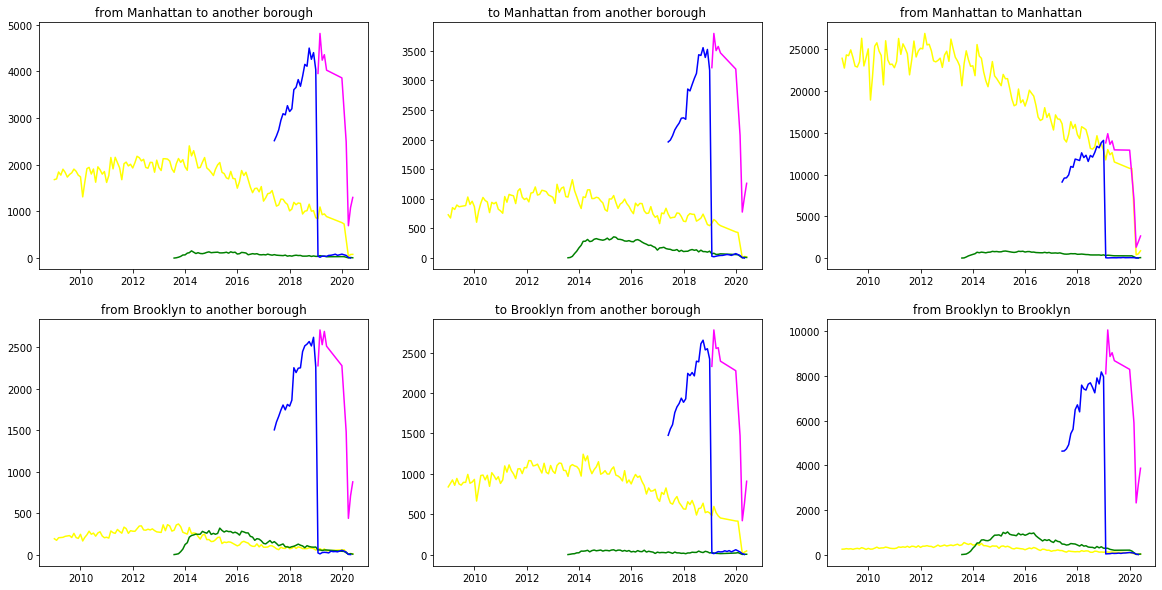

In [30]:
#Second option: only one line per graph.
fig, axes=plt.subplots(nrows=2,ncols=3, figsize=(20,10))

#Manhattan
axes[0,0].set(title='from Manhattan to another borough')
axes[0,0].plot(x_yellow,yellow_trip_M[0], color='yellow')
axes[0,0].plot(x_green,green_trip_M[0], color='green')
axes[0,0].plot(x_fhv,fhv_trip_M[0], color='blue')
axes[0,0].plot(x_fhvhv,fhvhv_trip_M[0], color='magenta')

axes[0,1].set(title='to Manhattan from another borough')
axes[0,1].plot(x_yellow,yellow_trip_M[1], color='yellow')
axes[0,1].plot(x_green,green_trip_M[1], color='green')
axes[0,1].plot(x_fhv,fhv_trip_M[1], color='blue')
axes[0,1].plot(x_fhvhv,fhvhv_trip_M[1], color='magenta')

axes[0,2].set(title='from Manhattan to Manhattan')
axes[0,2].plot(x_yellow,yellow_trip_M[2], color='yellow')
axes[0,2].plot(x_green,green_trip_M[2], color='green')
axes[0,2].plot(x_fhv,fhv_trip_M[2], color='blue')
axes[0,2].plot(x_fhvhv,fhvhv_trip_M[2], color='magenta')

#Brooklyn
axes[1,0].set(title='from Brooklyn to another borough')
axes[1,0].plot(x_yellow,yellow_trip_B[0], color='yellow')
axes[1,0].plot(x_green,green_trip_B[0], color='green')
axes[1,0].plot(x_fhv,fhv_trip_B[0], color='blue')
axes[1,0].plot(x_fhvhv,fhvhv_trip_B[0], color='magenta')

axes[1,1].set(title='to Brooklyn from another borough')
axes[1,1].plot(x_yellow,yellow_trip_B[1], color='yellow')
axes[1,1].plot(x_green,green_trip_B[1], color='green')
axes[1,1].plot(x_fhv,fhv_trip_B[1], color='blue')
axes[1,1].plot(x_fhvhv,fhvhv_trip_B[1], color='magenta')

axes[1,2].set(title='from Brooklyn to Brooklyn')
axes[1,2].plot(x_yellow,yellow_trip_B[2], color='yellow')
axes[1,2].plot(x_green,green_trip_B[2], color='green')
axes[1,2].plot(x_fhv,fhv_trip_B[2], color='blue')
axes[1,2].plot(x_fhvhv,fhvhv_trip_B[2], color='magenta')

#plt.setp(axes, ylim = (0,30000))
plt.show()

### Analysis and comment on the graphs:



We see immediately the familiar replacement of Yellow cabs by Uber, but here as well, FHV and FHV/FHVHV trips appear to be far more popular in Brooklyn than Manhattan. This would make some kind of sense - Yellow taxis would predominantly congregate in Manhattan, and their expense means we are likely looking at the effect of local business trips.  

What is particularly interesting is that Yellow and Green taxis are barely used in Brooklyn, but Uber & it's competitors still manage approximately >15,000 monthly trips. It would be interesting to compare this to Brooklyn's demographics. This odd trend would suggest that Brooklyn-ites would be almost all younger and more willing to use Uber, whereas the more wealthy residents in areas like Manhattan would likely be happy to use Yellow cabs.  

We can also note that far more trips are moving within boroughs than between them - of course, this probably just illustrates people's willingness to take a taxi to save on a short walk and their unwillingness to pay for longer trips. 

## Query 3: The monthly total receipts

The monthly total receipts, grouped per dataset type. Here, the total receipt is the sum
over all receipts in the same month. This should exclude tips, but include fares, surcharges,
taxes and tolls. Plot over time. Which service provider is making the most revenue?

Here, and in the next queries involving computation of statistics of costs, we prefer to rely on the variable "total_amount". As discussed in 2.3, since it is the only value that is actually paid by the customer, it is the one that is the most likely to be correct. Indeed, the total_amount contains fares, sur-charges, taxes, and tolls, as well as the 'extra', however as we also discovered in 2.3 and in the data dictionary, 'extra' appears to be composed of various additional sur-charges, meaning the total_amount entry is the most suitable suitable for our task. We do, however, need to remove the tip amount before arriving at a true receipt value.

We therefore decide to access the costs by relying on the relation:

total_amount - tip_amout = costs

In [31]:
#yellow
total_yellow_costs = []
avg_yellow_costs = []

for i in range (0,len(analysis_yellow_paths),1):
        
        df = pd.read_csv(analysis_yellow_paths[i])
                
        total_yellow_costs.append(df['costs'].sum())
        avg_yellow_costs.append( df['costs'].sum()/len(df.index))

In [32]:
#green
total_green_costs = []
avg_green_costs = []


for i in range (0,len(analysis_green_paths),1):
    
        df = pd.read_csv(analysis_green_paths[i])
 
        total_green_costs.append(df['costs'].sum())
        avg_green_costs.append( df['costs'].sum()/len(df.index))

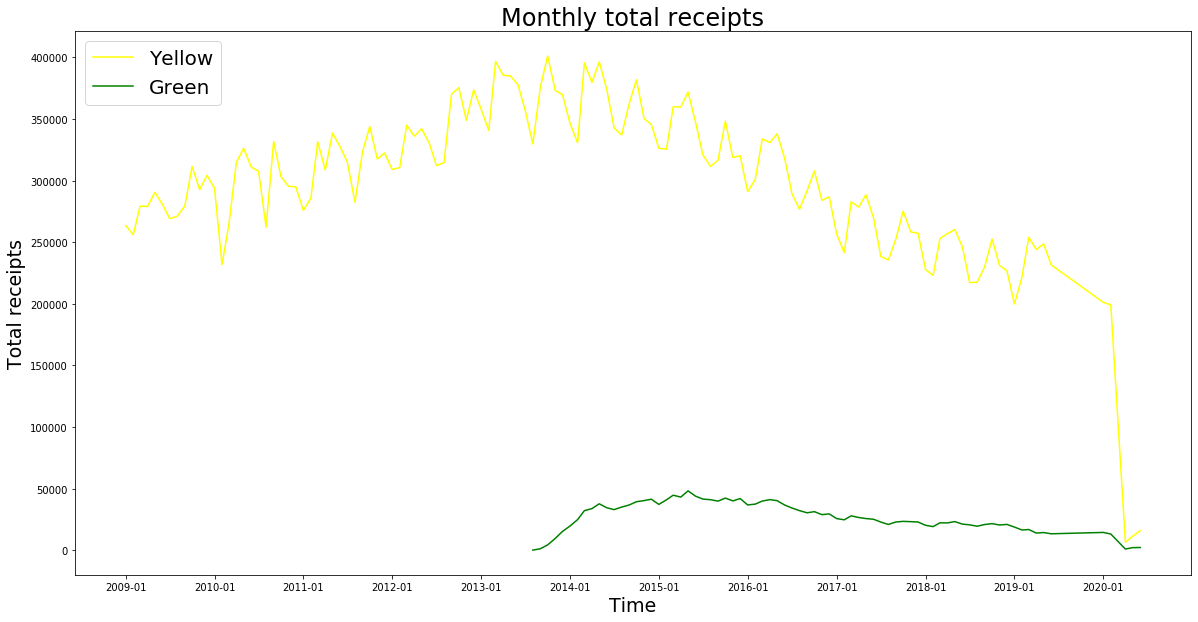

In [33]:
One_graph_for_two(total_yellow_costs, total_green_costs, 'Monthly total receipts', 'Total receipts', 'Time')

Again - we just as we saw with the overall number of trips, we can see how both Yellow and Green are affected by the recent rise of Uber (and even, in 2020, a little bit of coronavirus!)  

What is interesting again is that receipts again appear to spike every spring and autumn - people's willingness to pay for a cab depends on the weather.  

What is far more interesting is that despite Yellow average trips per month staying relatively flat until 2015, we see a pronounced increase in total receipts over the same period. We could possibly attribute this to the financial crisis - perhaps fares were lowered in the midst of the troubles, and had only just recovered when Uber & co. arrived.

Overall, however, we see that as expected, Yellow cabs as a whole are making far more revenue than the Green ones. This is to be expected, given the difference in trip numbers. What would be interesting would be a comparison to the FHV limousines, but we currently do not have this data.

## Query 4: The average trip receipt

The average trip receipt, where the average is computed over trips within the same month,
grouped per dataset type. Receipts should exclude tips, but include fares, surcharges, taxes
and toll. Plot over time. (Note: this query can only be evaluated for those sub-dataset
types that include receipt information.)

We have calculated the average costs in the previous code, so we can here proceed straight to a graph.

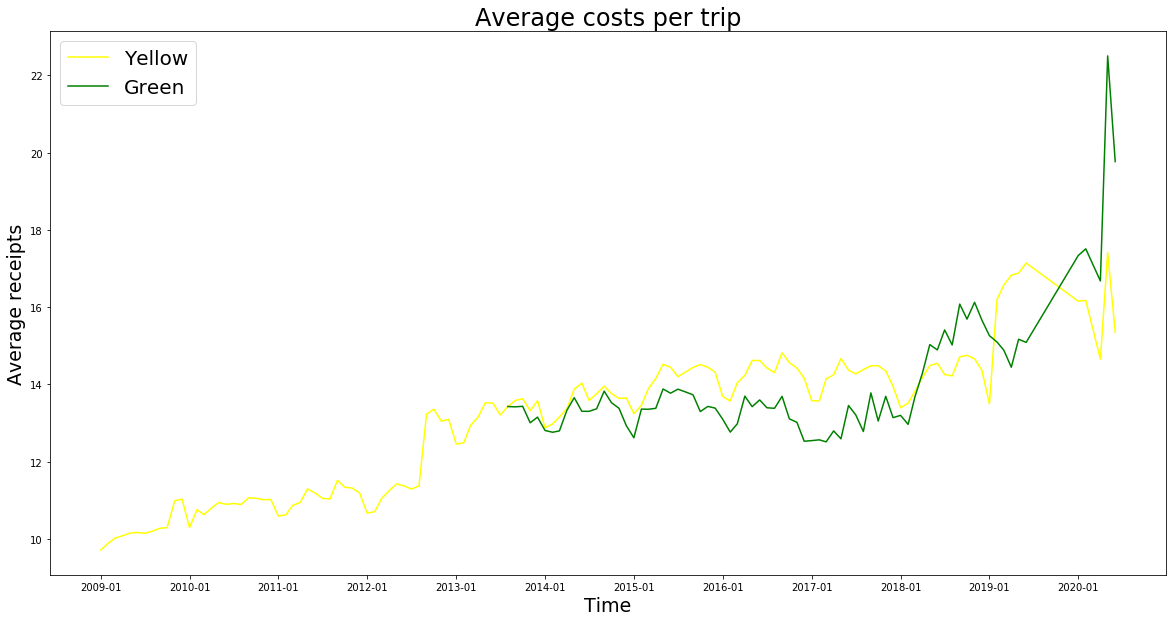

In [34]:
One_graph_for_two(avg_yellow_costs, avg_green_costs,'Average costs per trip','Average receipts','Time')

Possibly tied into uber and covid again, we see that, while people did seem to be using taxis less, the average trip receipt increases significantly over time, particularly for green taxis during covid lockdown. We could hypothesise that although people are less likely to use the traditional taxi services, they are more likely to use them for longer trips.

Discounting the covid anomaly, it does appear that Yellow and Green taxis are making approximately the same amount per trip - Green appears to be slightly less across time, but given the non-Manhattan based nature of this service, we could expect a slight fare reduction.

## Query 5: The average cost per in-progress-minute

The average cost per in-progress-minute, where the average is computed over trips within
the same month, grouped per dataset type. Cost should exclude tips, but include fares,
surcharges, taxes and tools. Plot over time. Which service is hence cheapest on average ?

### Computation solution

The computation of this statistic reveals an interesting problem. Some trips have a time entered of zero or near zero.  
While these data points are clean, as the trips could be very quick (jump in, jump out), the cost divided by a time quasi-null returns extremely high average costs per minute (as there is a startup fee for any cab journey).
For the analysis to make sense, we decided to exclude any trip where trip time is under 60 seconds.

In [35]:
#yellow
yellow_avg_costs_per_min = []

for i in range (0,len(analysis_yellow_paths),1):
    
    df = pd.read_csv(analysis_yellow_paths[i])
    
    #As discussed previously - drop trips which are too fast. We will preserve this choice across the remainder of the queries
    #We have previously dropped all times == 0 in 2.3 code
    #All trips with a time < 30s will now be dropped
    index_values=df[df['trip_time']<60].index
    df.drop(index_values,inplace=True)

    #Then average it for the month i. As csv are monthly produced, to  obtain the monthly average, we simply compute it at every iteration of the loop.
    # len(df[.index) computes the number of observation in the this file.
    avg_month = df['costs_per_in_prog_min'].sum()/len(df['costs_per_in_prog_min'].index)

    #Finally, we store this result in a list that will serve as the value for our graph, once the loop is over.
    yellow_avg_costs_per_min.append(avg_month)
    #this list contain the average for each month for the yellow sub-type of data.

In [36]:
#green
green_avg_costs_per_min = []

for i in range (0,len(analysis_green_paths),1):
    
    df = pd.read_csv(analysis_green_paths[i])

    #As discussed previously - drop trips which are too fast. We will preserve this choice across the remainder of the queries
    #We have previously dropped all times == 0 in 2.3 code
    #All trips with a time < 30s will now be dropped
    index_values=df[df['trip_time']<60].index
    df.drop(index_values,inplace=True)

    #Then average it for the month i. As csv are monthly produced, to  obtain the monthly average, we simply compute it at every iteration of the loop.
    # len(df[.index) computes the number of observation in the this file.
    avg_month = df['costs_per_in_prog_min'].sum()/len(df['costs_per_in_prog_min'].index)

    #Finally, we store this result in a list that will serve as the value for our graph, once the loop is over.
    green_avg_costs_per_min.append(avg_month)
    #this list contain the average for each month for the green sub-type of data.

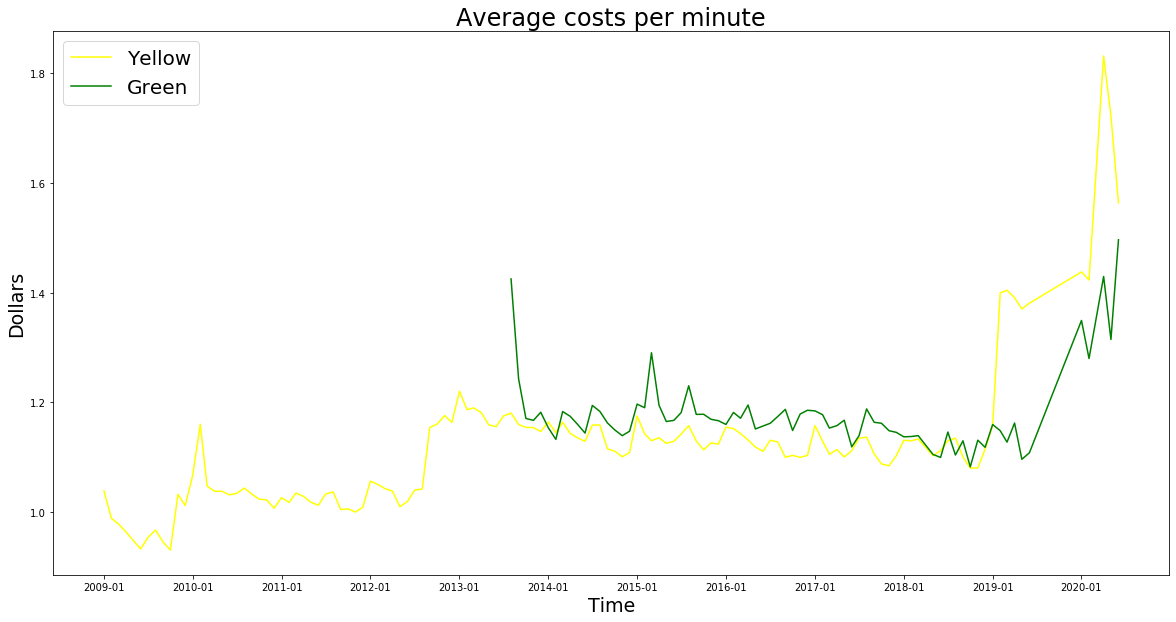

In [37]:
One_graph_for_two(yellow_avg_costs_per_min, green_avg_costs_per_min,'Average costs per minute','Dollars','Time')

There is again the impact of covid here - prices spiked in 2020 (possibly due to an additional covid surcharge?), but we see Yellow outperforming Green significantly since 2019. Perhaps their rates were hiked in January 2019 when industry regulations appeared to be refreshed, which the sharp increase in February 2019 would suggest.  

Yellow is by far and away on average more expensive per minute than Green after 2019, but before then, Green appears to be marginally more expensive.  Over the whole timeframe, the recent spike in yellow costs would likely outweigh the longer-term green trend, particularly given that Green records do not go back very far in time, and we could say Green is cheapest on average, but with a large footnote explaining data limitations.

## Query 6: The average tip per trip

The average tip per trip, where the average is computed over trips within the same month,
grouped per dataset type. Which service would you hence prefer to be in, as a driver (and assuming that
you don't have to share tips)?

### Computation solution:

Here we simply computed the sum of the tip amounts. We decided to exclude the the trips which had cash as a payment type, as values are evaluated at zero here, while in reality these trips have non-zero tips, just paid in un-recordable cash.

Using these obserations to compute the monthly tip average would therefore bias our results depending on the number of cash trips in that month.

In [38]:
#yellow

yellow_avg_tip = []

for i in range (0,len(analysis_yellow_paths),1):
    
        df = pd.read_csv(analysis_yellow_paths[i])

        #we exclude cash tips as they are 0 values.
        df = df[df['payment_type'] != 2]

        yellow_avg_tip.append(df['tip_amount'].sum()/len(df.index))

In [39]:
#green

green_avg_tip = []

for i in range (0,len(analysis_green_paths),1):
    
        df = pd.read_csv(analysis_green_paths[i])
        
        #we exclude cash tips as they are 0 values.
        df = df[df['payment_type'] != 2]
        
        green_avg_tip.append(df['tip_amount'].sum()/len(df.index))

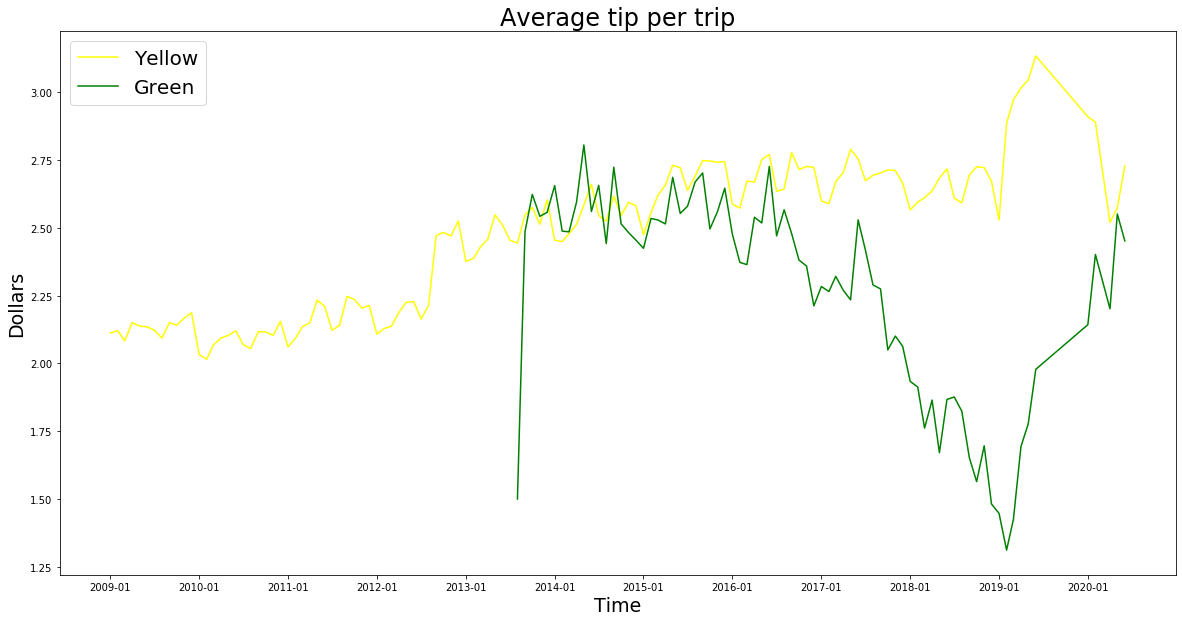

In [40]:
One_graph_for_two(yellow_avg_tip, green_avg_tip,'Average tip per trip','Dollars','Time')

The average tip per trip, here, seems to be increasing slightly for Yellow, perhaps in line with an increasing marginal propensity to tip. This could also be the result of the American percentage tip system, and what we saw earlier in the increasing average costs per trip over time. It is interesting, though, that these seem to flatten at $3.00 - perhaps it is some psychological barrier to tipping.  

Green, however, tells a markedly different story, with tips (ignoring the beginning of records, where we have 13 trips) plummeting over time to 2019, then rocketing upwards (along with yellow) immediately afterwards. This may correspond to an interesting policy decision by the TLC: 

*On March 29, 2018 the TLC approved the two-year Flex Fare Pilot, which allows E-Hail licensees to dispatch taxis using rates other than the metered fare. This Pilot Program allows the taxi industry to adopt the upfront pricing structures that exist in the For-Hire Vehicle industry*

*Under this Pilot Program, participating TLC-licensed E-Hail app companies are permitted to offer upfront fares to
taxicab and Street Hail Livery passengers. The pilot officially began on June 27, 2018*

We could therefore assume that the dropoff in tip rates is associated with Green pre-booked taxis offering more uber-like services over time, and post 2019 these services were able to move to the FHVHV classification, bringing the averages back up. If we make the assumption that uber-type trips command a lower tip, this story would fit. It would also help that the Green taxis operate in the more residential districts, meaning they are more likely to benefit from ride-hailing services than the Manhattan based Yellow taxis. Of course, actual validation would be required, but it would be something worth investigating.

In general though, based on only this data, it appears to be far more lucrative to be a Yellow taxi driver, and one would prefer to be with this service (as you would expect - passengers in Manhattan would tip better than those in Queens).

## Query 7: Median monthly average trip speed per borough

The median monthly average trip speed, where the median is computed over trips within
the same month, grouped per dataset type and per borough. Plot over time. 

### Computation solution

Average trip speed was calculated earlier - it is simply total distance / total time.

We assume here that the purpose of this analysis is to arrive at the median average trip speed within a borough for a given month, in order to see how the traffic speed within that borough is changing over time. We thus filter for trips with a pick-up and a drop-off within the same borough, to avoid throwing off our results.

We also make the further filter of speed != 0. In t3, we kept records with 0 distance, as they would be perhaps useful to calculate average wait times before leaving, or the number of abandoned trips, but we will now filter for these and run this query on the average trip speed for trips which moved.

We will also filter for trips with a duration of <60 seconds. This time, we will not have an excessive cost/minute as in the previous queries, but will likely have a speed which is abnormally low (assuming 60 seconds is barely enough time to begin moving)

In [41]:
#yellow

yellow_med_Bronx = []
yellow_med_Manhattan = []
yellow_med_Brooklyn = []
yellow_med_Staten_Island = []
yellow_med_Queens = []


for i in range (0,len(analysis_yellow_paths),1):
    df = pd.read_csv(analysis_yellow_paths[i])
    
    #speed computations are calculated above, with other time values.

    #We need to re-filter here as we did not drop these observations from the main dataframe
    index_values=df[df['trip_time']<60].index
    df.drop(index_values,inplace=True)
    
    #Remember - we set all trips which did not move to have a speed of 0
    index_values=df[df['trip_speed']==0].index
    df.drop(index_values,inplace=True)
    
    g_med_Bronx = df[(df['BoroughPU'].isin(['Bronx'])) & (df['BoroughDO'].isin(['Bronx']))]['trip_speed'].median()
    g_med_Manhattan = df[(df['BoroughPU'].isin(['Manhattan'])) & (df['BoroughDO'].isin(['Manhattan']))]['trip_speed'].median()
    g_med_Brooklyn = df[(df['BoroughPU'].isin(['Brooklyn'])) & (df['BoroughDO'].isin(['Brooklyn']))]['trip_speed'].median()
    g_med_Staten_Island = df[(df['BoroughPU'].isin(['Staten Island'])) & (df['BoroughDO'].isin(['Staten Island']))]['trip_speed'].median()
    g_med_Queens = df[(df['BoroughPU'].isin(['Queens'])) & (df['BoroughDO'].isin(['Queens']))]['trip_speed'].median()

    yellow_med_Bronx.append(g_med_Bronx)
    yellow_med_Manhattan.append(g_med_Manhattan)
    yellow_med_Brooklyn.append(g_med_Brooklyn)
    yellow_med_Staten_Island.append(g_med_Staten_Island)
    yellow_med_Queens.append(g_med_Queens)
    

In [42]:
#green

green_med_Bronx = []
green_med_Manhattan = []
green_med_Brooklyn = []
green_med_Staten_Island = []
green_med_Queens = []


for i in range (0,len(analysis_green_paths),1):
    df = pd.read_csv(analysis_green_paths[i])
    
    #speed computations are calculated above, with other time values.

    #We need to re-filter here as we did not drop these observations from the main dataframe
    index_values=df[df['trip_time']<60].index
    df.drop(index_values,inplace=True)
    
    #Remember - we set all trips which did not move to have a speed of 0
    index_values=df[df['trip_speed']==0].index
    df.drop(index_values,inplace=True)
    
    g_med_Bronx = df[(df['BoroughPU'].isin(['Bronx'])) & (df['BoroughDO'].isin(['Bronx']))]['trip_speed'].median()
    g_med_Manhattan = df[(df['BoroughPU'].isin(['Manhattan'])) & (df['BoroughDO'].isin(['Manhattan']))]['trip_speed'].median()
    g_med_Brooklyn = df[(df['BoroughPU'].isin(['Brooklyn'])) & (df['BoroughDO'].isin(['Brooklyn']))]['trip_speed'].median()
    g_med_Staten_Island = df[(df['BoroughPU'].isin(['Staten Island'])) & (df['BoroughDO'].isin(['Staten Island']))]['trip_speed'].median()
    g_med_Queens = df[(df['BoroughPU'].isin(['Queens'])) & (df['BoroughDO'].isin(['Queens']))]['trip_speed'].median()

    green_med_Bronx.append(g_med_Bronx)
    green_med_Manhattan.append(g_med_Manhattan)
    green_med_Brooklyn.append(g_med_Brooklyn)
    green_med_Staten_Island.append(g_med_Staten_Island)
    green_med_Queens.append(g_med_Queens)
    

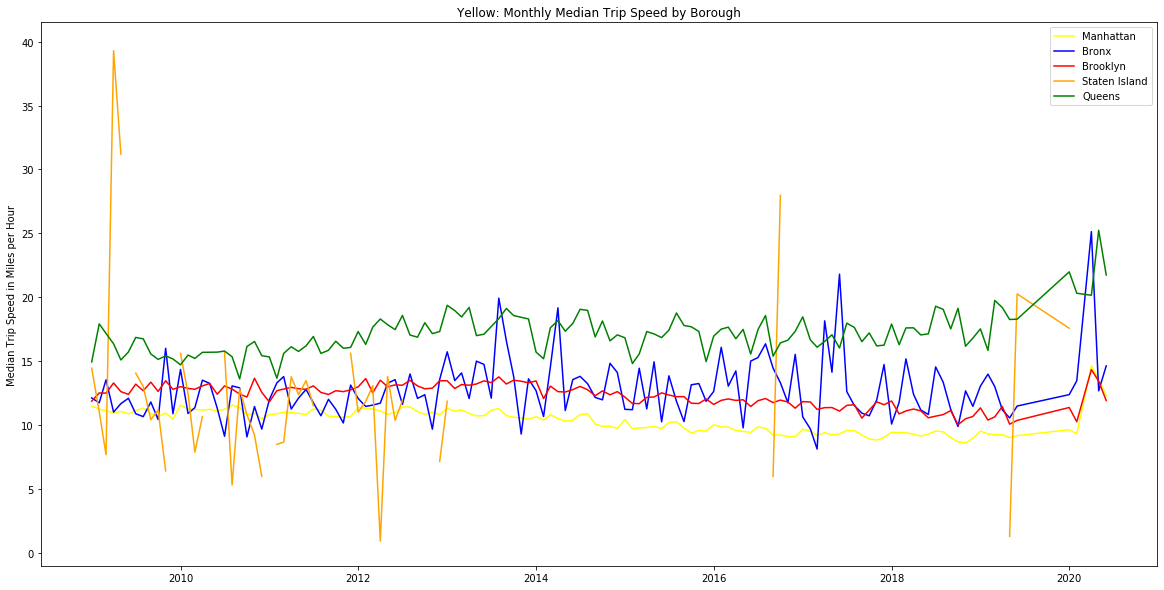

In [43]:
#Graphs:
plt.figure(figsize=(20,10))

#yellow
x2 = x_yellow
y1 = yellow_med_Manhattan
y2 = yellow_med_Bronx
y3 = yellow_med_Brooklyn
y4 = yellow_med_Staten_Island
y5 = yellow_med_Queens
# plotting the line 2 points 


plt.plot(x2, y1, label = "Manhattan",color='yellow')
plt.plot(x2, y2, label = "Bronx",color='blue')
plt.plot(x2, y3, label = "Brooklyn",color='Red')
plt.plot(x2, y4, label = "Staten Island",color='Orange')
plt.plot(x2, y5, label = "Queens",color='green')
# Set the y axis label of the current axis.
plt.ylabel('Median Trip Speed in Miles per Hour')
# Set a title of the current axes.
plt.title('Yellow: Monthly Median Trip Speed by Borough')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

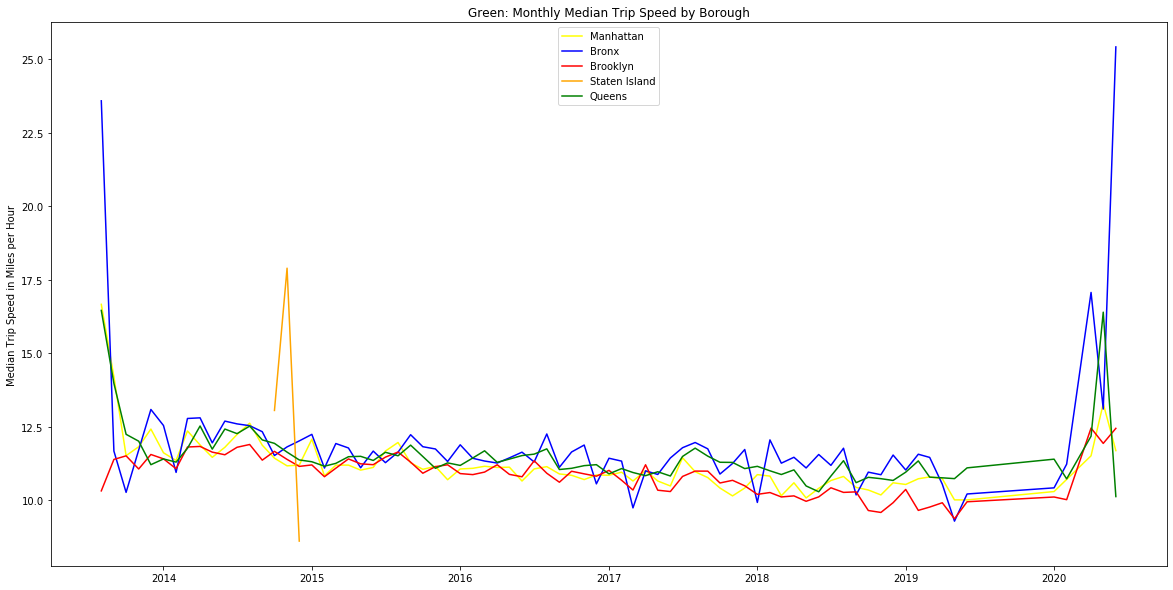

In [44]:
#Graphs:
plt.figure(figsize=(20,10))

#green
x2 = x_green
y1 = green_med_Manhattan
y2 = green_med_Bronx
y3 = green_med_Brooklyn
y4 = green_med_Staten_Island
y5 = green_med_Queens
# plotting the line 2 points 


plt.plot(x2, y1, label = "Manhattan",color='yellow')
plt.plot(x2, y2, label = "Bronx",color='blue')
plt.plot(x2, y3, label = "Brooklyn",color='Red')
plt.plot(x2, y4, label = "Staten Island",color='Orange')
plt.plot(x2, y5, label = "Queens",color='green')
# Set the y axis label of the current axis.
plt.ylabel('Median Trip Speed in Miles per Hour')
# Set a title of the current axes.
plt.title('Green: Monthly Median Trip Speed by Borough')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

We see in both sets that as expected, taxis in Manhattan and Brooklyn are incredibly slow, and that Queens and Staten Island (when the data exists) cabs can drive quickly. We also see a massive speed hike in early 2020 - a clear sign of covid 19 and the empty streets which it produced.


## Query 8: How long does it take to go to the airport?

How long does it take to get to a New York City Airport? New York City has 3 airport:
Newark Airport, JFK, and LaGuardia Airport. Assume that the trip to the airport starts
in Manhattan Midtown (zones 161-164), Chelsea (zones 68, 246), Times Squeare (zone 230) or Garment District (zone 100) . This query can be answered from different per-
spectives.  

First, compute the median travel time from Manhattan Midtown to the airport
under consideration, binned per departure time (e.g., departure between midnight and 1h,
between 1h and 2h, ...).  
Here the median is computed over all trips.  
Plot the results, per
airport.  

What is the best timeslot to depart to the airport?  

What is the worst timeslot?

For the best and worst timeslots, also compute how the monthly median travel time has
evolved over the past years.

### Solution approach

To arrive at the median times, we iterate through all dataframes in storage, filtering where necessary for loationID, departure locale, and bin(the time). We then are able to loop through our bins to calculate our medians. We have three different function pairs below to perform our calculations - they are fairly similar in structure and in nature. Their exact functionality can be found in the comments.

In [46]:
def extract_median_time_month(airportFilePath, leftfrom, airport_locID):
# extracts the travel times for a given sub-set, a given departure location, and a locationID in a pandas DF

#q8ID = [[161,162,163,164],[68,246],[230],[100]]
#Name_q8 = ['Midtown', 'Chelsea','Times Square','Garment District']
    
    cols = ['bin', 'trip_time_m']
    air_df = pd.DataFrame(columns=cols)

    for i in range (0,len(airportFilePath),1):
        df = pd.read_csv(airportFilePath[i])

#         #Select the observations from the given bin
#         df = df[df['bin'].isin([timebin])]
        
        #Select only the observations that end up at the airport specified
        df = df[df['dolocationid'].isin([airport_locID])]
        
        #Select the observations that leave from the correct region
        df = df[df['airport_departure'].isin([leftfrom])][['bin','trip_time_m']]
        
        #Join back to the main dataframe
        air_df = pd.concat([air_df,df],0,sort=True)
        
    return air_df

def overall_median_time(departure, airport_locID):
# uses the previous function to move over all taxi types and build a large pandas df with all airport trips
#q8ID = [[161,162,163,164],[68,246],[230],[100]]
#Name_q8 = ['Midtown', 'Chelsea','Times Square','Garment District']

    cols = ['bin', 'trip_time_m']
    air_df = pd.DataFrame(columns=cols)
    
    #we can just iterate through all files for the given airport, and extract the median travel times
    tempdf = extract_median_time_month(analysis_yellow_paths, departure, airport_locID)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    tempdf = extract_median_time_month(analysis_green_paths, departure, airport_locID)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    tempdf = extract_median_time_month(analysis_fhv_paths, departure, airport_locID)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
                             
    tempdf = extract_median_time_month(analysis_fhvhv_paths, departure, airport_locID)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    #Here, we iterate across the number of bins and calculate a median by filtering
    medians = []
    for i in range(0,24):
        if len(air_df[air_df['bin'].isin([i])]) == 0:
            medians.append(None)
        else:
            med = air_df[air_df['bin'].isin([i])]['trip_time_m'].median()
            medians.append(med)
    
    return medians

In [47]:
def extract_median_time_month_allDeparture(airportFilePath, airport_locID):
# extracts the travel times for a given sub-set and a locationID in a pandas DF - returns ALL DEPARTURE LOCATIONS

#q8ID = [[161,162,163,164],[68,246],[230],[100]]
#Name_q8 = ['Midtown', 'Chelsea','Times Square','Garment District']
    
    cols = ['bin', 'trip_time_m']
    air_df = pd.DataFrame(columns=cols)

    for i in range (0,len(airportFilePath),1):
        df = pd.read_csv(airportFilePath[i])

#         #Select the observations from the given bin
#         df = df[df['bin'].isin([timebin])]
        
        #Select only the observations that end up at the airport specified
        df = df[df['dolocationid'].isin([airport_locID])]
        
        #Select the observations that leave from the correct region
        df = df[(df['airport_departure'].isin(['Midtown'])) |\
                (df['airport_departure'].isin(['Chelsea'])) |\
                (df['airport_departure'].isin(['Times Square'])) |\
                (df['airport_departure'].isin(['Garment District']))\
                ][['bin','trip_time_m']]
        
        air_df = pd.concat([air_df,df],0,sort=True)
        
    return air_df

def overall_median_time_allDeparture(airport_locID):
# uses the previous function to move over all taxi types and build a large pandas df with all airport trips
#q8ID = [[161,162,163,164],[68,246],[230],[100]]
#Name_q8 = ['Midtown', 'Chelsea','Times Square','Garment District']

    cols = ['bin', 'trip_time_m']
    air_df = pd.DataFrame(columns=cols)
    
    #we can just iterate through all files for the given airport, and extract the median travel times
    tempdf = extract_median_time_month_allDeparture(analysis_yellow_paths, airport_locID)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    tempdf = extract_median_time_month_allDeparture(analysis_green_paths, airport_locID)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    tempdf = extract_median_time_month_allDeparture(analysis_fhv_paths, airport_locID)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
                             
    tempdf = extract_median_time_month_allDeparture(analysis_fhvhv_paths, airport_locID)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    medians = []
    for i in range(0,24):
        if len(air_df[air_df['bin'].isin([i])]) == 0:
            medians.append(None)
        else:
            med = air_df[air_df['bin'].isin([i])]['trip_time_m'].median()
            medians.append(med)
    
    return medians

In [48]:
hours = []
for i in range (0,24):
    hours.append(str(i) + "-" + str(i+1))

In [49]:
#q8ID = [[161,162,163,164],[68,246],[230],[100]]
#Name_q8 = ['Midtown', 'Chelsea','Times Square','Garment District']
#  1    Newark Airport
#  132  JFK Airport
#  138  LaGuardia Airport

NEW_times_mid = overall_median_time('Midtown', 1)
JFK_times_mid = overall_median_time('Midtown', 132)
LAG_times_mid = overall_median_time('Midtown', 138)

NEW_times_chl = overall_median_time('Chelsea', 1)
JFK_times_chl = overall_median_time('Chelsea', 132)
LAG_times_chl = overall_median_time('Chelsea', 138)

NEW_times_ts = overall_median_time('Times Square', 1)
JFK_times_ts = overall_median_time('Times Square', 132)
LAG_times_ts = overall_median_time('Times Square', 138)

NEW_times_gd = overall_median_time('Garment District', 1)
JFK_times_gd = overall_median_time('Garment District', 132)
LAG_times_gd = overall_median_time('Garment District', 138)

In [50]:
NEW_times_all = overall_median_time_allDeparture(1)
JFK_times_all = overall_median_time_allDeparture(132)
LAG_times_all = overall_median_time_allDeparture(138)

In [51]:
def simpleMinIndex(list):

    lowest = 100000
    lowestIndex = 25
    for i in range(0,24):
        if list[i]!= None and list[i] <= lowest:
            lowest = list[i]
            lowestIndex = i
    
    return lowestIndex

def simpleMaxIndex(list):

    greatest = -1
    greatestIndex = 25
    for i in range(0,24):
        if list[i]!= None and list[i] >= greatest:
            greatest = list[i]
            greatestIndex = i
    
    return greatestIndex

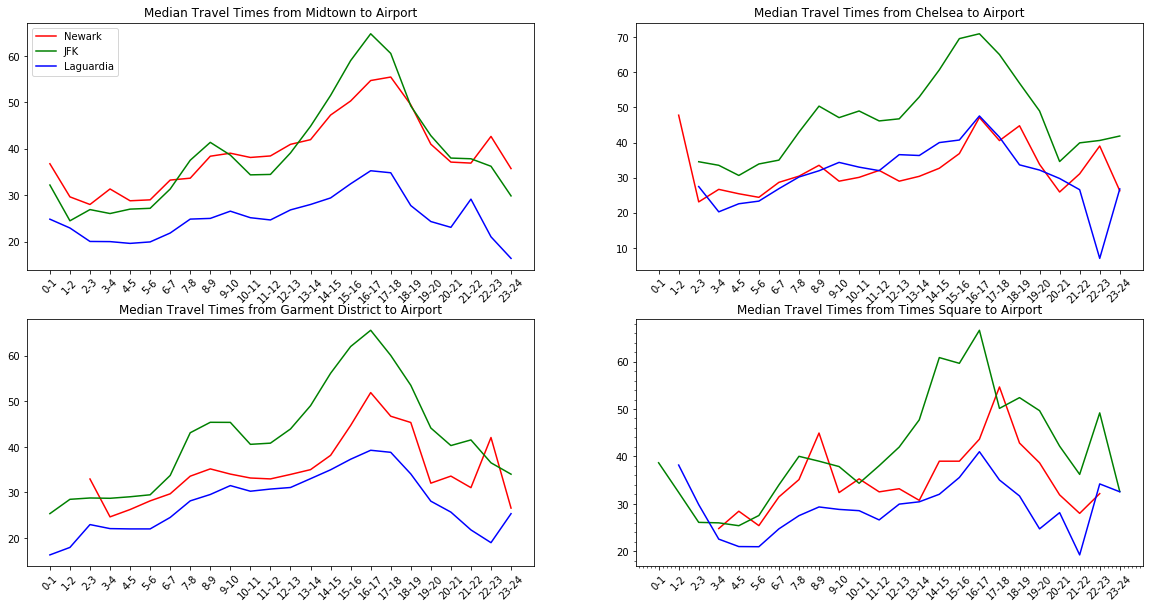

In [52]:
#Second option: only one line per graph.
fig, axes=plt.subplots(nrows=2,ncols=2, figsize=(20,10))


#Manhattan
axes[0,0].set(title='Median Travel Times from Midtown to Airport')
axes[0,0].plot(hours,NEW_times_mid, color='red', label='Newark')
axes[0,0].plot(hours,JFK_times_mid, color='green', label='JFK')
axes[0,0].plot(hours,LAG_times_mid, color='blue', label='Laguardia')
axes[0,0].xaxis.set_visible(True)
axes[0,0].yaxis.set_visible(True)
for tick in axes[0,0].get_xticklabels():
    tick.set_rotation(45)
for tick in axes[0,0].get_xticklabels():
    tick.set_rotation(45)
axes[0,0].legend(loc='upper left')

axes[0,1].set(title='Median Travel Times from Chelsea to Airport')
axes[0,1].plot(hours,NEW_times_chl, color='red', label='Newark')
axes[0,1].plot(hours,JFK_times_chl, color='green', label='JFK')
axes[0,1].plot(hours,LAG_times_chl, color='blue', label='Laguardia')
axes[0,1].xaxis.set_visible(True)
axes[0,1].yaxis.set_visible(True)
for tick in axes[0,1].get_xticklabels():
    tick.set_rotation(45)
for tick in axes[0,1].get_xticklabels():
    tick.set_rotation(45)

axes[1,0].set(title='Median Travel Times from Garment District to Airport')
axes[1,0].plot(hours,NEW_times_ts, color='red', label='Newark')
axes[1,0].plot(hours,JFK_times_ts, color='green', label='JFK')
axes[1,0].plot(hours,LAG_times_ts, color='blue', label='Laguardia')
axes[1,0].xaxis.set_visible(True)
axes[1,0].yaxis.set_visible(True)
for tick in axes[1,0].get_xticklabels():
    tick.set_rotation(45)
for tick in axes[1,0].get_xticklabels():
    tick.set_rotation(45)

axes[1,1].set(title='Median Travel Times from Times Square to Airport')
axes[1,1].plot(hours,NEW_times_gd, color='red', label='Newark')
axes[1,1].plot(hours,JFK_times_gd, color='green', label='JFK')
axes[1,1].plot(hours,LAG_times_gd, color='blue', label='Laguardia')
axes[1,1].xaxis.set_visible(True)
axes[1,1].yaxis.set_visible(True)
for tick in axes[1,1].get_xticklabels():
    tick.set_rotation(45)
for tick in axes[1,1].get_xticklabels():
    tick.set_rotation(45)

#plt.setp(axes, ylim = (0,30000))
plt.minorticks_on()
plt.show()

As expected, midnight (when planes are no longer leaving) appears to be the best time to leave for the Airport, while mid-afternoon appears to be the worst. What is interesting is that the peak seems to be between 3-5pm, rather than the 5-7pm which we would expect. Perhaps, given these trips are leaving from central New York, we are seeing the effect of travelling consultants and salesmen, who would want to be home by dinnertime.

In [53]:
print("Between "+str(simpleMinIndex(NEW_times_mid))+" and "+str(simpleMinIndex(NEW_times_mid)+1)+\
      " o'clock was the best timeslot to leave from Midtown to Newark" )
print("Between "+str(simpleMinIndex(JFK_times_mid))+" and "+str(simpleMinIndex(JFK_times_mid)+1)+\
      " o'clock was the best timeslot to leave from Midtown to JFK" )
print("Between "+str(simpleMinIndex(LAG_times_mid))+" and "+str(simpleMinIndex(LAG_times_mid)+1)+\
      " o'clock was the best timeslot to leave from Midtown to Laguardia" )

Between 2 and 3 o'clock was the best timeslot to leave from Midtown to Newark
Between 1 and 2 o'clock was the best timeslot to leave from Midtown to JFK
Between 23 and 24 o'clock was the best timeslot to leave from Midtown to Laguardia


In [54]:
print("Between "+str(simpleMaxIndex(NEW_times_mid))+" and "+str(simpleMaxIndex(NEW_times_mid)+1)+\
      " o'clock was the worst timeslot to leave from Midtown to Newark" )
print("Between "+str(simpleMaxIndex(JFK_times_mid))+" and "+str(simpleMaxIndex(JFK_times_mid)+1)+\
      " o'clock was the worst timeslot to leave from Midtown to JFK" )
print("Between "+str(simpleMaxIndex(LAG_times_mid))+" and "+str(simpleMaxIndex(LAG_times_mid)+1)+\
      " o'clock was the worst timeslot to leave from Midtown to Laguardia" )

Between 17 and 18 o'clock was the worst timeslot to leave from Midtown to Newark
Between 16 and 17 o'clock was the worst timeslot to leave from Midtown to JFK
Between 16 and 17 o'clock was the worst timeslot to leave from Midtown to Laguardia


In [55]:
print("Between "+str(simpleMinIndex(NEW_times_chl))+" and "+str(simpleMinIndex(NEW_times_chl)+1)+\
      " o'clock was the best timeslot to leave from Chelsea to Newark" )
print("Between "+str(simpleMinIndex(JFK_times_chl))+" and "+str(simpleMinIndex(JFK_times_chl)+1)+\
      " o'clock was the best timeslot to leave from Chelsea to JFK" )
print("Between "+str(simpleMinIndex(LAG_times_chl))+" and "+str(simpleMinIndex(LAG_times_chl)+1)+\
      " o'clock was the best timeslot to leave from Chelsea to Laguardia" )

Between 2 and 3 o'clock was the best timeslot to leave from Chelsea to Newark
Between 4 and 5 o'clock was the best timeslot to leave from Chelsea to JFK
Between 22 and 23 o'clock was the best timeslot to leave from Chelsea to Laguardia


In [56]:
print("Between "+str(simpleMaxIndex(NEW_times_chl))+" and "+str(simpleMaxIndex(NEW_times_chl)+1)+\
      " o'clock was the worst timeslot to leave from Chelsea to Newark" )
print("Between "+str(simpleMaxIndex(JFK_times_chl))+" and "+str(simpleMaxIndex(JFK_times_chl)+1)+\
      " o'clock was the worst timeslot to leave from Chelsea to JFK" )
print("Between "+str(simpleMaxIndex(LAG_times_chl))+" and "+str(simpleMaxIndex(LAG_times_chl)+1)+\
      " o'clock was the worst timeslot to leave from Chelsea to Laguardia" )

Between 1 and 2 o'clock was the worst timeslot to leave from Chelsea to Newark
Between 16 and 17 o'clock was the worst timeslot to leave from Chelsea to JFK
Between 16 and 17 o'clock was the worst timeslot to leave from Chelsea to Laguardia


In [57]:
print("Between "+str(simpleMinIndex(NEW_times_ts))+" and "+str(simpleMinIndex(NEW_times_ts)+1)+\
      " o'clock was the best timeslot to leave from Times Square to Newark" )
print("Between "+str(simpleMinIndex(JFK_times_ts))+" and "+str(simpleMinIndex(JFK_times_ts)+1)+\
      " o'clock was the best timeslot to leave from Times Square to JFK" )
print("Between "+str(simpleMinIndex(LAG_times_ts))+" and "+str(simpleMinIndex(LAG_times_ts)+1)+\
      " o'clock was the best timeslot to leave from Times Square to Laguardia" )

Between 3 and 4 o'clock was the best timeslot to leave from Times Square to Newark
Between 0 and 1 o'clock was the best timeslot to leave from Times Square to JFK
Between 0 and 1 o'clock was the best timeslot to leave from Times Square to Laguardia


In [58]:
print("Between "+str(simpleMaxIndex(NEW_times_ts))+" and "+str(simpleMaxIndex(NEW_times_ts)+1)+\
      " o'clock was the worst timeslot to leave from Times Square to Newark" )
print("Between "+str(simpleMaxIndex(JFK_times_ts))+" and "+str(simpleMaxIndex(JFK_times_ts)+1)+\
      " o'clock was the worst timeslot to leave from Times Square to JFK" )
print("Between "+str(simpleMaxIndex(LAG_times_ts))+" and "+str(simpleMaxIndex(LAG_times_ts)+1)+\
      " o'clock was the worst timeslot to leave from Times Square to Laguardia" )

Between 16 and 17 o'clock was the worst timeslot to leave from Times Square to Newark
Between 16 and 17 o'clock was the worst timeslot to leave from Times Square to JFK
Between 16 and 17 o'clock was the worst timeslot to leave from Times Square to Laguardia


In [59]:
print("Between "+str(simpleMinIndex(NEW_times_gd))+" and "+str(simpleMinIndex(NEW_times_gd)+1)+\
      " o'clock was the best timeslot to leave from Garment District to Newark" )
print("Between "+str(simpleMinIndex(JFK_times_gd))+" and "+str(simpleMinIndex(JFK_times_gd)+1)+\
      " o'clock was the best timeslot to leave from Garment District to JFK" )
print("Between "+str(simpleMinIndex(LAG_times_gd))+" and "+str(simpleMinIndex(LAG_times_gd)+1)+\
      " o'clock was the best timeslot to leave from Garment District to Laguardia" )

Between 3 and 4 o'clock was the best timeslot to leave from Garment District to Newark
Between 4 and 5 o'clock was the best timeslot to leave from Garment District to JFK
Between 21 and 22 o'clock was the best timeslot to leave from Garment District to Laguardia


In [60]:
print("Between "+str(simpleMaxIndex(NEW_times_gd))+" and "+str(simpleMaxIndex(NEW_times_gd)+1)+\
      " o'clock was the worst timeslot to leave from Garment District to Newark" )
print("Between "+str(simpleMaxIndex(JFK_times_gd))+" and "+str(simpleMaxIndex(JFK_times_gd)+1)+\
      " o'clock was the worst timeslot to leave from Garment District to JFK" )
print("Between "+str(simpleMaxIndex(LAG_times_gd))+" and "+str(simpleMaxIndex(LAG_times_gd)+1)+\
      " o'clock was the worst timeslot to leave from Garment District to Laguardia" )

Between 17 and 18 o'clock was the worst timeslot to leave from Garment District to Newark
Between 16 and 17 o'clock was the worst timeslot to leave from Garment District to JFK
Between 16 and 17 o'clock was the worst timeslot to leave from Garment District to Laguardia


In [61]:
print("Between "+str(simpleMinIndex(NEW_times_all))+" and "+str(simpleMinIndex(NEW_times_all)+1)+\
      " o'clock was the best timeslot to leave from the city center to Newark" )
print("Between "+str(simpleMinIndex(JFK_times_all))+" and "+str(simpleMinIndex(JFK_times_all)+1)+\
      " o'clock was the best timeslot to leave from the city center to JFK" )
print("Between "+str(simpleMinIndex(LAG_times_all))+" and "+str(simpleMinIndex(LAG_times_all)+1)+\
      " o'clock was the best timeslot to leave from the city center to Laguardia" )

Between 3 and 4 o'clock was the best timeslot to leave from the city center to Newark
Between 4 and 5 o'clock was the best timeslot to leave from the city center to JFK
Between 4 and 5 o'clock was the best timeslot to leave from the city center to Laguardia


In [62]:
print("Between "+str(simpleMaxIndex(NEW_times_all))+" and "+str(simpleMaxIndex(NEW_times_all)+1)+\
      " o'clock was the worst timeslot to leave from the city center to Newark" )
print("Between "+str(simpleMaxIndex(JFK_times_all))+" and "+str(simpleMaxIndex(JFK_times_all)+1)+\
      " o'clock was the worst timeslot to leave from the city center to JFK" )
print("Between "+str(simpleMaxIndex(LAG_times_all))+" and "+str(simpleMaxIndex(LAG_times_all)+1)+\
      " o'clock was the worst timeslot to leave from the city center to Laguardia" )

Between 16 and 17 o'clock was the worst timeslot to leave from the city center to Newark
Between 16 and 17 o'clock was the worst timeslot to leave from the city center to JFK
Between 16 and 17 o'clock was the worst timeslot to leave from the city center to Laguardia


In [63]:
bestBinNEW = 3
bestBinJFK = 4
bestBinLAG = 4
worstBinNEW = 16
worstBinJFK = 16
worstBinLAG = 16

In [64]:
def extract_df_best_worst_time(airportFilePath, airport_locID, timebin):
# extracts the travel times for a given sub-set, a given departure location, and a locationID in a pandas DF

#q8ID = [[161,162,163,164],[68,246],[230],[100]]
#Name_q8 = ['Midtown', 'Chelsea','Times Square','Garment District']
    
    cols = ['bin', 'trip_time_m','airport_date']
    air_df = pd.DataFrame(columns=cols)

    for i in range (0,len(airportFilePath),1):
        df = pd.read_csv(airportFilePath[i])
        
        #Select the observations from the given bin
        df = df[df['bin'].isin([timebin])]
        
        #Select only the observations that end up at the airport specified
        df = df[df['dolocationid'].isin([airport_locID])]
        
        #Select the observations that leave from the correct region
        df = df[(df['airport_departure'].isin(['Midtown'])) |\
                (df['airport_departure'].isin(['Chelsea'])) |\
                (df['airport_departure'].isin(['Times Square'])) |\
                (df['airport_departure'].isin(['Garment District']))\
                ][['bin','trip_time_m','airport_date']]
        
        air_df = pd.concat([air_df,df],0,sort=True)
       
    return air_df

def list_median_time_bestworst(airport_locID, timebin):
# uses the previous function to move over all taxi types and build a large pandas df with all airport trips
#q8ID = [[161,162,163,164],[68,246],[230],[100]]
#Name_q8 = ['Midtown', 'Chelsea','Times Square','Garment District']

    cols = ['bin', 'trip_time_m','airport_date']
    air_df = pd.DataFrame(columns=cols)
    
    #we can just iterate through all files for the given airport, and extract the median travel times
    tempdf = extract_df_best_worst_time(analysis_yellow_paths, airport_locID, timebin)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    tempdf = extract_df_best_worst_time(analysis_green_paths, airport_locID, timebin)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    tempdf = extract_df_best_worst_time(analysis_fhv_paths, airport_locID, timebin)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
                             
    tempdf = extract_df_best_worst_time(analysis_fhvhv_paths, airport_locID, timebin)
    air_df = pd.concat([air_df,tempdf],0,sort=True)
    
    #We can extract a list of valid dates from the returned dataframe
    medians = []
    datesDF = air_df['airport_date'].unique()
    
    dates = datesDF.tolist()
    dates.sort()
    
    #In this variation, we additionally filter off of the trip time
    #This allows us to calculate a median across all taxi types across times
    for i in dates:
            med = air_df[air_df['airport_date'].isin([i])]['trip_time_m'].median()
            medians.append(med)
    
    return dates, medians

In [65]:
NEW_best_times = list_median_time_bestworst(1,bestBinNEW)
JFK_best_times = list_median_time_bestworst(132,bestBinJFK)
LAG_best_times = list_median_time_bestworst(138,bestBinLAG)
NEW_worst_times = list_median_time_bestworst(1,worstBinNEW)
JFK_worst_times = list_median_time_bestworst(132,worstBinJFK)
LAG_worst_times = list_median_time_bestworst(138,worstBinLAG)


In [66]:
def q8_graph(best, worst, title, y_label, x_label, bestBin, worstBin):
    
    bestx = Xs_for_graphs(best[0])
    worstx = Xs_for_graphs(worst[0])

    #Plot the values passed against the time.
    
    #set the size of the graph
    plt.figure(figsize=(20,10))

    #set the x axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    
    #Define the series to display
    plt.plot(bestx, best[1], label='Best Travel Bin: '+str(bestBin)+'-'+str(bestBin+1), color='blue')
    plt.plot(worstx, worst[1], label='Worst Travel Bin: '+str(worstBin)+'-'+str(worstBin+1), color='red')
    
    #parameters
    plt.title(title,fontsize=24)
    plt.ylabel(y_label,fontsize = 19)
    plt.xlabel(x_label, fontsize = 19)
    plt.legend(loc='upper left',fontsize=20)
    plt.show()

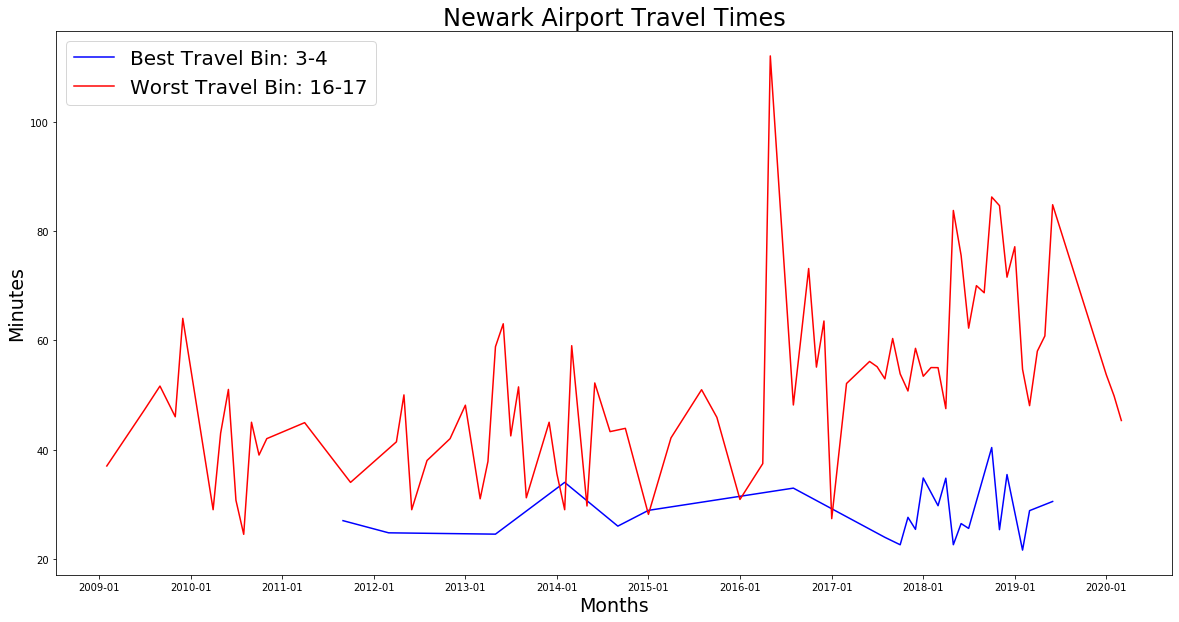

In [67]:
q8_graph(NEW_best_times, NEW_worst_times, 'Newark Airport Travel Times', 'Minutes', 'Months', bestBinNEW, worstBinNEW)

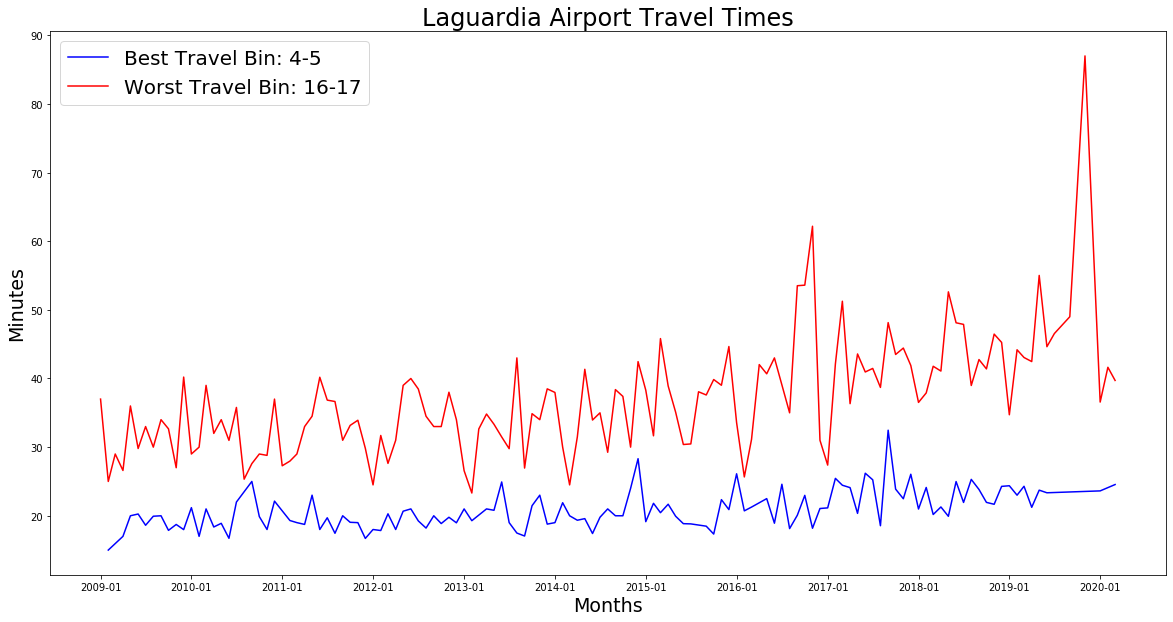

In [68]:
q8_graph(LAG_best_times, LAG_worst_times, 'Laguardia Airport Travel Times', 'Minutes', 'Months', bestBinLAG, worstBinLAG)

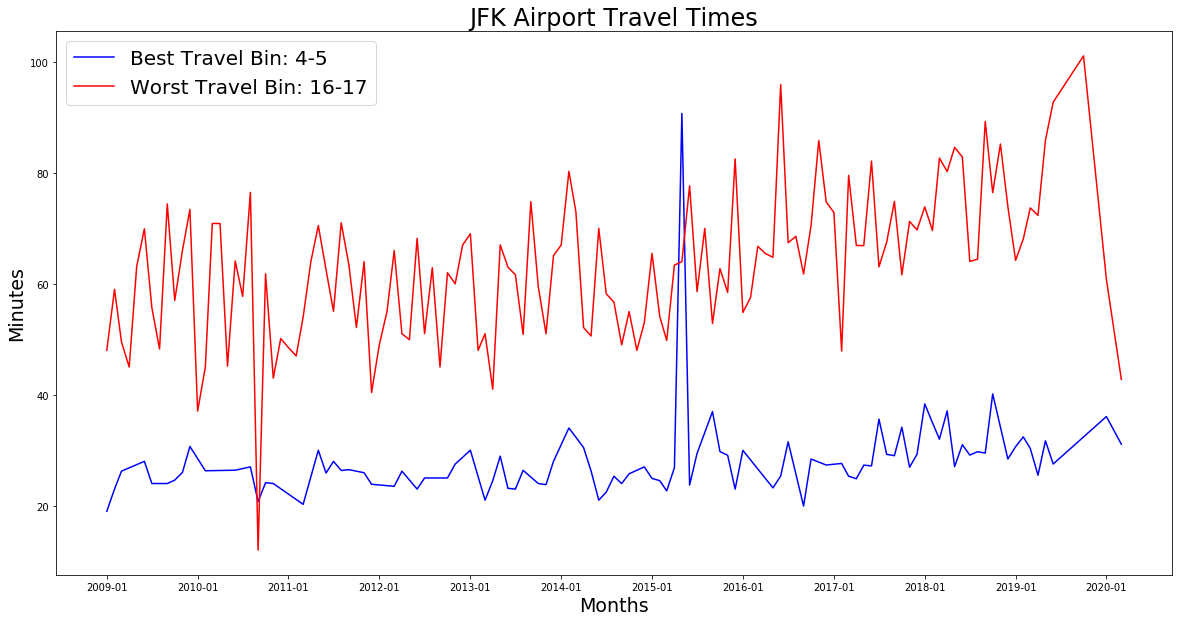

In [69]:
q8_graph(JFK_best_times, JFK_worst_times, 'JFK Airport Travel Times', 'Minutes', 'Months', bestBinJFK, worstBinJFK)

For all airports, average travel times seem to be increasing. This is a trend which we would expect, given normal population growth and again the rise of Uber, which would bring far more congestion to cities (the NYC TLC reports that Uber cabs are driving around empty a full 40% of the time).